In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [2]:
keras.__version__

'2.10.0'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
class_names[y_train[0]]

'Coat'

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
hid1 = model.layers[1]

In [11]:
model.get_layer('dense') is hid1

True

In [12]:
hid1.get_weights()

[array([[ 0.05929804,  0.06355093, -0.01135698, ...,  0.04511974,
          0.03163667, -0.03430772],
        [-0.01013827,  0.01567693, -0.05477124, ...,  0.00225955,
          0.04834915,  0.00175726],
        [-0.00139235,  0.01228368,  0.04015785, ...,  0.01810025,
         -0.05799886,  0.04655981],
        ...,
        [ 0.00307699,  0.07198466, -0.01636182, ...,  0.06241331,
         -0.02622407,  0.0150905 ],
        [-0.00238223, -0.00488541,  0.06846699, ..., -0.05025303,
          0.0511878 ,  0.0469598 ],
        [ 0.06346892, -0.04248867, -0.06112754, ...,  0.03469019,
          0.05616094,  0.02702876]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [13]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7190 - accuracy: 0.7625 - val_loss: 0.5301 - val_accuracy: 0.8144
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4916 - accuracy: 0.8297 - val_loss: 0.5265 - val_accuracy: 0.8056
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4452 - accuracy: 0.8426 - val_loss: 0.4159 - val_accuracy: 0.8580
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4172 - accuracy: 0.8543 - val_loss: 0.4212 - val_accuracy: 0.8532
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3956 - accuracy: 0.8610 - val_loss: 0.3775 - val_accuracy: 0.8704
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3810 - accuracy: 0.8659 - val_loss: 0.3777 - val_accuracy: 0.8660
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3675 - accuracy: 0.8693 - val_loss: 0.3863 - val_accuracy:

<AxesSubplot:>

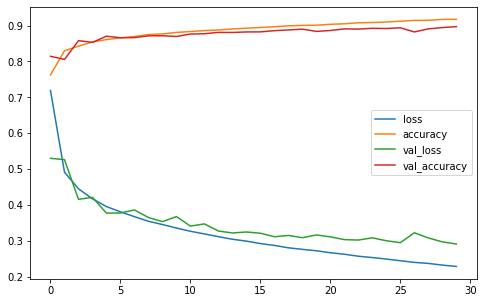

In [15]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [20]:
model.evaluate(X_test/255, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3234 - accuracy: 0.8882


[0.3234429657459259, 0.8881999850273132]

In [24]:
X_new = X_test[:3]/255

In [25]:
y_proba = model.predict(X_new)

1/1 [==============================] - 0s 63ms/step


In [26]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [41]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
housing = fetch_california_housing()

In [44]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [45]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [46]:
scaler = StandardScaler()

In [107]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [108]:
keras.backend.clear_session()

In [132]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [133]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                270       
                                                                 
 dense_13 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [134]:
model.compile(loss='mean_squared_error',
             optimizer='sgd')

In [135]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.5986 - val_loss: 0.5357
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5253 - val_loss: 0.6155
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4731 - val_loss: 0.7631
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4571 - val_loss: 0.9845
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4421 - val_loss: 1.2020
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4316 - val_loss: 1.5052
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4224 - val_loss: 1.6880
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4160 - val_loss: 1.9566
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4073 - val_loss: 2.1364
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4028 - val_loss: 2.3286

In [136]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3749


In [137]:
mse_test

0.37494349479675293

In [138]:
X_new = X_test[:3]

In [139]:
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 44ms/step


In [140]:
y_pred

array([[0.8376633],
       [2.6049235],
       [4.8294578]], dtype=float32)

In [142]:
y_test[:3]

array([0.533  , 2.333  , 5.00001])

<AxesSubplot:>

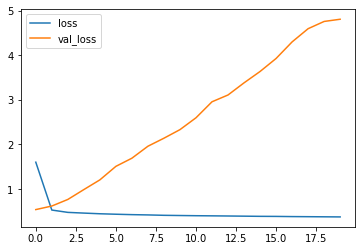

In [141]:
pd.DataFrame(history.history).plot()

In [176]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [210]:
keras.backend.clear_session()
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(70, activation='relu')(input_)
hidden2 = keras.layers.Dense(70, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1, activation='relu')(concat)
model = keras.Model(inputs=[input_], outputs=[output])
model.compile(loss='mean_squared_error',
            optimizer=keras.optimizers.SGD(learning_rate=0.0003))

In [213]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=5)

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 0.5006 - val_loss: 0.4818
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4985 - val_loss: 0.4814
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4965 - val_loss: 0.4816
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4947 - val_loss: 0.4824
Epoch 5/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4930 - val_loss: 0.4833


In [214]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4791


0.4791037440299988

In [215]:
model.predict(X_test[:3]) 

1/1 [==============================] - 0s 47ms/step


array([[0.73420274],
       [2.7520154 ],
       [4.906751  ]], dtype=float32)

In [216]:
y_test[:3]

array([0.533  , 2.333  , 5.00001])

In [229]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
